In [52]:
## Import Pacakges Required for Coding
## The packages required are Pandas, Numpy for data manipulation and manipulating output array
## Matplotib is used for generating graphs
## Statsmodel is used for finding out the output through the OLS model and get various model measuring parameters
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plot
import statsmodels.api as sm

In [2]:
## Import the data set which needs to be processed
data = pd.read_csv(r'C:\\Users\\ADV\\Desktop\\Sneha\\Logistic Regression .csv')
data

,Cash Compensation,Sales,No.of Employees,Capital Investment,Manufacturing
0,212,32.0,248,10.5,1
1,226,27.2,156,3.8,0
2,237,49.5,348,14.6,1
3,239,34.0,196,5.0,0
4,242,52.8,371,15.9,1
5,245,37.6,216,5.7,0
6,253,60.7,425,18.3,1
7,262,49.2,285,8.0,0
8,271,75.1,524,22.6,1
9,285,69.0,401,12.3,0


In [11]:
## Using Sklearn (Sci-kit learn) import the train test split function, the accuracy score of the model, and logistic regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [12]:
## Rename a variable of the column for simplicity
data.rename(index = str, columns = {'Manufacturing' : 'Y'}, inplace = True)
data.head()

,Cash Compensation,Sales,No.of Employees,Capital Investment,Y
0,212,32.0,248,10.5,1
1,226,27.2,156,3.8,0
2,237,49.5,348,14.6,1
3,239,34.0,196,5.0,0
4,242,52.8,371,15.9,1


In [13]:
## Designate the data set to predictors and target variable
X = data[['Cash Compensation', 'Sales', 'No.of Employees', 'Capital Investment']]
y = data['Y']

In [14]:
## Split the data set into train and test model for model fitting
## Here we split the dataset in a ratio of 3:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [15]:
## Using logistic regression create the model
logistic_regression = LogisticRegression()
## Fit the training dataset into the model
logistic_regression.fit(X_train, y_train)
## Predict the model on the test data set
y_pred = logistic_regression.predict(X_test)

In [24]:
## Find the intercept of the model
logistic_regression.intercept_

array([25.93417555])

In [28]:
## Find the coefficients of the variables
logistic_regression.coef_

array([[-0.122911  , -0.67421874,  0.11791558,  0.00302601]])

In [40]:
## From Sklearn import the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report 
## Define the confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)

In [18]:
## Printing the confusion matrix
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[1 0]
 [1 4]]


In [20]:
## Finding the accuracy of the model
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.8333333333333334


In [30]:
## Predicitng the probability of the vaiables of the model
logistic_regression.predict_proba(X_train)

array([[9.99997604e-01, 2.39633771e-06],
       [0.00000000e+00, 1.00000000e+00],
       [2.08849558e-02, 9.79115044e-01],
       [1.65918366e-02, 9.83408163e-01],
       [9.99999518e-01, 4.81691619e-07],
       [1.23002563e-02, 9.87699744e-01],
       [1.08869556e-02, 9.89113044e-01],
       [9.82751481e-01, 1.72485186e-02],
       [6.06980466e-10, 9.99999999e-01],
       [9.99750346e-01, 2.49654205e-04],
       [9.97011288e-01, 2.98871248e-03],
       [9.97060371e-01, 2.93962942e-03],
       [9.62254271e-01, 3.77457293e-02],
       [5.11893782e-04, 9.99488106e-01],
       [9.99999868e-01, 1.31961832e-07],
       [9.99999039e-01, 9.60595764e-07]])

In [32]:
## Determining the logistic regression score
logistic_regression.score(X_train, y_train)

1.0

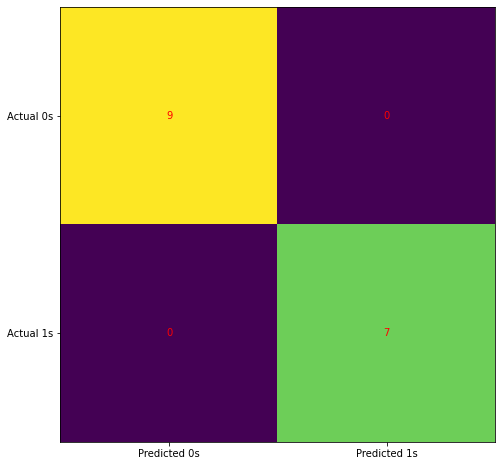

In [38]:
## Draw the confusion matrix for the model
cm = confusion_matrix(y_train, logistic_regression.predict(X_train))

fig, ax = plot.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plot.show()

In [41]:
## Determining the classfication report for the model
print(classification_report(y_train, logistic_regression.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         7

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [62]:
## Applying the OLS model to determine model fit and other values
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.611
Model:                            OLS   Adj. R-squared (uncentered):              0.525
Method:                 Least Squares   F-statistic:                              7.081
Date:                Wed, 02 Sep 2020   Prob (F-statistic):                     0.00131
Time:                        11:31:06   Log-Likelihood:                         -14.151
No. Observations:                  22   AIC:                                      36.30
Df Residuals:                      18   BIC:                                      40.67
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------